In [ ]:

# Cargar librerías necesarias
import pandas as pd
from pycaret.classification import *

# Cargar el dataset
file_path = "Data_Taller_MLE.csv"  
columns = ["id", "age", "income", "loan_amount", "loan_term", "credit_score", "employment_status", "loan_purpose", "existing_loans", "income_variability", "loan_status"]

# Cargar los datos con los nombres correctos de las columnas
data = pd.read_csv(file_path, names=columns, header=0)

# Convertir columnas categóricas a tipo adecuado
data["employment_status"] = data["employment_status"].astype("category")
data["loan_purpose"] = data["loan_purpose"].astype("category")
data["income_variability"] = data["income_variability"].astype("category")
data["loan_status"] = data["loan_status"].astype("int")  # Variable objetivo

# Mostrar las primeras filas
data.head()


,id,age,income,loan_amount,loan_term,credit_score,employment_status,loan_purpose,existing_loans,income_variability,loan_status
0,1,51,4796,23157,36,652,Unemployed,Car,1,High,0
1,2,54,9717,27006,36,314,Unemployed,Home,4,High,0
2,3,61,6516,14190,24,604,Employed,Education,2,Low,0
3,4,49,4493,45180,12,553,Self-Employed,Education,4,High,1
4,5,34,6231,23449,24,819,Unemployed,Car,4,High,0


In [3]:

# Configurar el experimento en PyCaret
exp_clf = setup(data=data,
                target="loan_status",
                categorical_features=["employment_status", "loan_purpose", "income_variability"],
                numeric_features=["age", "income", "loan_amount", "loan_term", "credit_score", "existing_loans"],
                session_id=123,
                normalize=True,  
                transformation=True, 
                data_split_shuffle=True,
                fix_imbalance=True,
                verbose=False)


In [ ]:

# Comparar modelos y seleccionar el mejor
best_model = compare_models()


In [ ]:

# Registrar el modelo en MLflow
from pycaret.classification import save_model
save_model(best_model, "best_loan_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'income', 'loan_amount',
                                              'loan_term', 'credit_score',
                                              'existing_loans'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transforme...
                  TransformerWrapper(exclude=None, include=None,
                    

In [6]:
#creamos un modelo rf
rf_model= create_model('rf')
#mostramos un resumen del modelo
print(rf_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5414,0.4991,0.7812,0.5929,0.6741,-0.0525,-0.0585
1,0.5629,0.5065,0.8042,0.6046,0.6903,-0.0041,-0.0046
2,0.5814,0.5083,0.8231,0.6155,0.7043,0.0366,0.0414
3,0.5400,0.4609,0.8066,0.5876,0.6799,-0.0700,-0.0822
4,0.5600,0.4896,0.8090,0.6018,0.6901,-0.0149,-0.0170
5,0.5686,0.5076,0.8090,0.6082,0.6943,0.0090,0.0102
6,0.5529,0.4966,0.7925,0.5989,0.6822,-0.0249,-0.0279
7,0.5443,0.4815,0.7948,0.5923,0.6788,-0.0504,-0.0573
8,0.5714,0.5428,0.8090,0.6103,0.6957,0.0170,0.0190


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [7]:
#Optimización de hiperparametros

tuned_rf= tune_model(rf_model)

print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6071,0.5413,1.0000,0.6071,0.7556,0.0000,0.0000
1,0.6057,0.4948,1.0000,0.6057,0.7544,0.0000,0.0000
2,0.6057,0.5088,1.0000,0.6057,0.7544,0.0000,0.0000
3,0.5971,0.5162,0.9788,0.6032,0.7464,-0.0124,-0.0390
4,0.6057,0.5233,1.0000,0.6057,0.7544,0.0000,0.0000
5,0.6057,0.4701,1.0000,0.6057,0.7544,0.0000,0.0000
6,0.6057,0.4662,1.0000,0.6057,0.7544,0.0000,0.0000
7,0.6057,0.4941,1.0000,0.6057,0.7544,0.0000,0.0000
8,0.6057,0.5139,1.0000,0.6057,0.7544,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


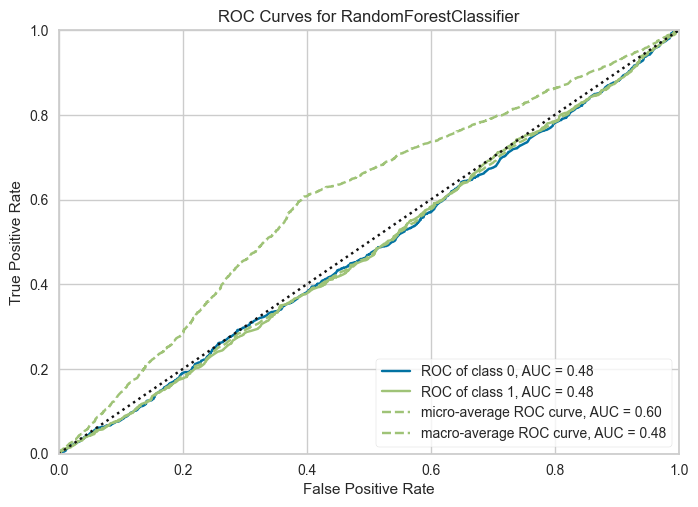

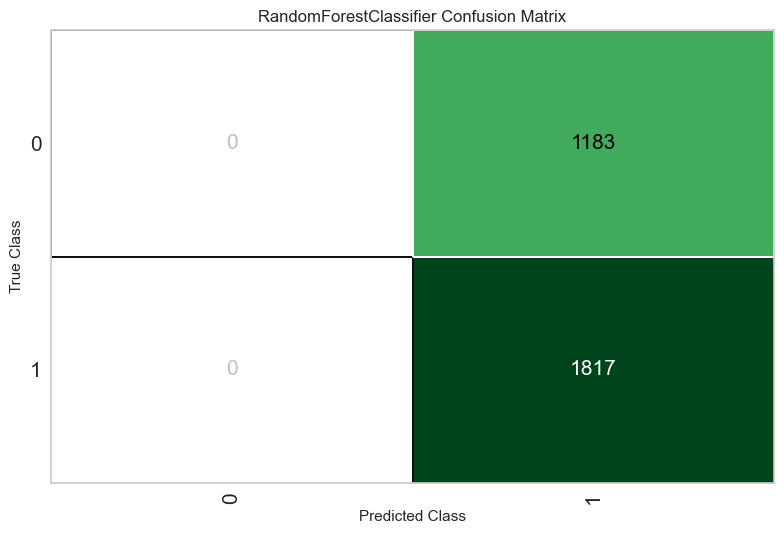

In [8]:
#Revisamos la CURVA ROC
plot_model(tuned_rf,plot='auc')

#matriz de confusion
plot_model(tuned_rf,plot='confusion_matrix')

In [9]:
#Evaluamos el modelo:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
#Finalizando el modelo entrenandolo en todo el dataset
final_rf = finalize_model(tuned_rf)

#Realizar la predicción sobre el mismo dataset
predictions = predict_model(final_rf,data=data)

print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6058,0.5194,1.0000,0.6058,0.7545,0.0000,0.0000


   id  age  income  loan_amount  loan_term  credit_score employment_status  \
0   1   51    4796        23157         36           652        Unemployed   
1   2   54    9717        27006         36           314        Unemployed   
2   3   61    6516        14190         24           604          Employed   
3   4   49    4493        45180         12           553     Self-Employed   
4   5   34    6231        23449         24           819        Unemployed   

  loan_purpose  existing_loans income_variability  loan_status  \
0          Car               1               High            0   
1         Home               4               High            0   
2    Education               2                Low            0   
3    Education               4               High            1   
4          Car               4               High            0   

   prediction_label  prediction_score  
0                 1            0.5579  
1                 1            0.5628  
2             

In [11]:
save_model(final_rf,'final_rf_model')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'income', 'loan_amount',
                                              'loan_term', 'credit_score',
                                              'existing_loans'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transforme...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
            

In [12]:
loaded_model= load_model('final_rf_model')

Transformation Pipeline and Model Successfully Loaded


In [13]:
prediction_loaded = predict_model(loaded_model,data=data)
print(prediction_loaded.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6058,0.5194,1.0000,0.6058,0.7545,0.0000,0.0000


   id  age  income  loan_amount  loan_term  credit_score employment_status  \
0   1   51    4796        23157         36           652        Unemployed   
1   2   54    9717        27006         36           314        Unemployed   
2   3   61    6516        14190         24           604          Employed   
3   4   49    4493        45180         12           553     Self-Employed   
4   5   34    6231        23449         24           819        Unemployed   

  loan_purpose  existing_loans income_variability  loan_status  \
0          Car               1               High            0   
1         Home               4               High            0   
2    Education               2                Low            0   
3    Education               4               High            1   
4          Car               4               High            0   

   prediction_label  prediction_score  
0                 1            0.5579  
1                 1            0.5628  
2             

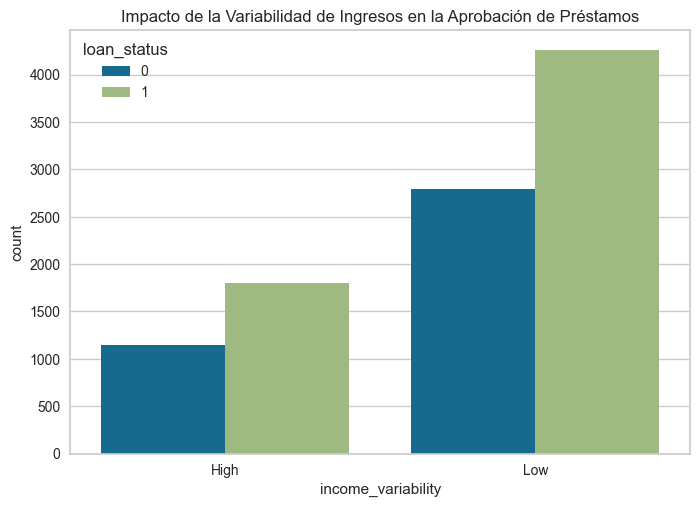

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ver la distribución de loan_status según income_variability
sns.countplot(x="income_variability", hue="loan_status", data=data)
plt.title("Impacto de la Variabilidad de Ingresos en la Aprobación de Préstamos")
plt.show()


In [16]:
%pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [26]:
import mlflow
import mlflow.sklearn
from pycaret.classification import *
import pandas as pd
import joblib
from fastapi import FastAPI, Depends, HTTPException
from fastapi.security import HTTPBasic, HTTPBasicCredentials
import uvicorn
import logging

# Configurar MLflow
MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Loan_Classification")

# Inicializar FastAPI
app = FastAPI()

# Seguridad básica para proteger las rutas
security = HTTPBasic()
users = {"admin": "password123"}

def authenticate(credentials: HTTPBasicCredentials = Depends(security)):
    if users.get(credentials.username) != credentials.password:
        raise HTTPException(status_code=401, detail="Acceso denegado, credenciales incorrectas")
    return credentials.username

# Ruta para entrenar el modelo
@app.post("/train")
def train_model(user: str = Depends(authenticate)):
    try:
        logging.info("Entrenamiento iniciado por el usuario: %s", user)
        # Cargar el dataset
        file_path = "Data_Taller_MLE.csv"
        columns = ["id", "age", "income", "loan_amount", "loan_term", "credit_score", "employment_status", "loan_purpose", "existing_loans", "income_variability", "loan_status"]
        data = pd.read_csv(file_path, names=columns, header=0)
        
        # Configurar PyCaret
        exp_clf = setup(data=data,
                        target="loan_status",
                        categorical_features=["employment_status", "loan_purpose", "income_variability"],
                        numeric_features=["age", "income", "loan_amount", "loan_term", "credit_score", "existing_loans"],
                        session_id=123,
                        normalize=True,
                        transformation=True,
                        data_split_shuffle=True,
                        fix_imbalance=True,
                        verbose=False)
        
        # Entrenar y guardar el modelo
        best_model = create_model('rf')
        final_model = finalize_model(best_model)
        joblib.dump(final_model, "final_rf_model.pkl")

        # Registrar en MLflow
        with mlflow.start_run():
            mlflow.sklearn.log_model(final_model, "rf_model")
        
        return {"message": "Modelo entrenado y guardado correctamente"}
    
    except Exception as e:
        return {"error": str(e)}

# Ruta para realizar predicciones
@app.post("/predict")
def predict(data: dict, user: str = Depends(authenticate)):
    try:
        # Cargar el modelo entrenado
        model = joblib.load("final_rf_model.pkl")
        
        # Convertir entrada a DataFrame
        df = pd.DataFrame([data])
        
        # Realizar la predicción
        prediction = model.predict(df)
        
        return {"loan_status_prediction": int(prediction[0])}
    
    except Exception as e:
        return {"error": str(e)}

# Para ejecutar la API
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


RuntimeError: asyncio.run() cannot be called from a running event loop